In [2]:
import le
import pandas as pd

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [4]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
iris = fetch_ucirepo(id=53) 

In [5]:
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
dataset = iris.data.original
# metadata 
print(iris.metadata) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [16]:
print(dataset)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


# Задание 2 (Разделение данных на обучающие и тестовые)

In [6]:
train_indices = dataset.sample(frac=0.8, random_state=42).index

# Создаем маску для разделения
train_mask = dataset.index.isin(train_indices)

# Разделяем данные
train_dataset = dataset[train_mask]
test_dataset = dataset[~train_mask]

In [7]:
print("Количество строк в обучающем множестве: ",train_dataset.shape[0])

Количество строк в обучающем множестве:  120


In [8]:
print("Количество объектов в каждом классе:\n ",train_dataset['class'].value_counts())

Количество объектов в каждом классе:
  class
Iris-setosa        43
Iris-versicolor    39
Iris-virginica     38
Name: count, dtype: int64


In [9]:
print("Количество пропущенных значений: \n",train_dataset.isnull().sum())

Количество пропущенных значений: 
 sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


In [10]:
print("Максимальное значение для параметра: \n",train_dataset.max())

Максимальное значение для параметра: 
 sepal length               7.9
sepal width                4.4
petal length               6.9
petal width                2.5
class           Iris-virginica
dtype: object


In [11]:
print("Максимальное значение для параметра: \n",train_dataset.min())

Максимальное значение для параметра: 
 sepal length            4.3
sepal width             2.0
petal length            1.0
petal width             0.1
class           Iris-setosa
dtype: object


In [13]:
print("Среднее значение для параметра: \n",train_dataset.drop('class',axis=1).mean())

Среднее значение для параметра: 
 sepal length    5.803333
sepal width     3.074167
petal length    3.669167
petal width     1.171667
dtype: float64


In [54]:
import numpy as np
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y_encoded = np.squeeze( le.fit_transform(y))
X_train, X_test, y_train, y_test = train_test_split(
    X, np.squeeze(y_encoded), test_size=0.2, random_state=42
)

model = GaussianNB()

model.fit(X_train, y_train)

# Предсказания для обучающего и тестового множеств
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


C:\Users\maksk\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ТАБЛИЦА КЛАССИФИКАЦИИ - ОБУЧАЮЩЕЕ МНОЖЕСТВО:
[[40  0  0]
 [ 0 38  3]
 [ 0  3 36]]

ТАБЛИЦА КЛАССИФИКАЦИИ - ТЕСТОВОЕ МНОЖЕСТВО:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



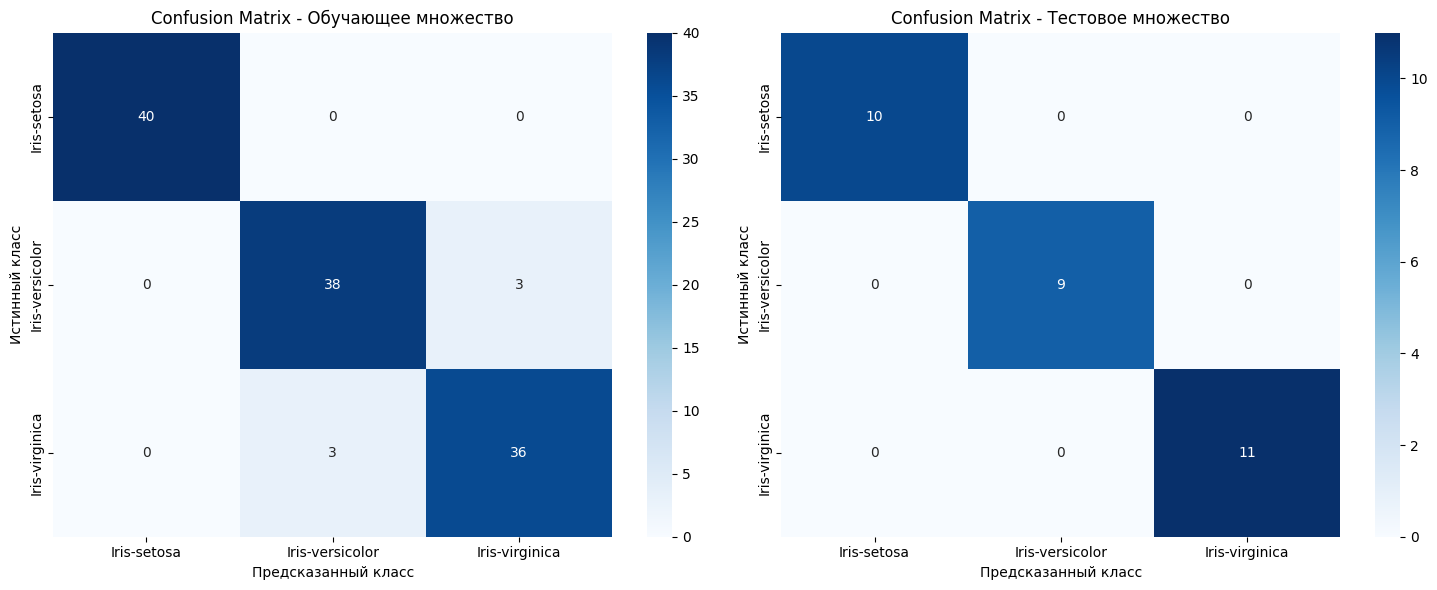

In [55]:
# Таблица классификации для обучающего множества
train_cm = confusion_matrix(y_train, y_train_pred)
print("ТАБЛИЦА КЛАССИФИКАЦИИ - ОБУЧАЮЩЕЕ МНОЖЕСТВО:")
print(train_cm)
print()

# Таблица классификации для тестового множества
test_cm = confusion_matrix(y_test, y_test_pred)
print("ТАБЛИЦА КЛАССИФИКАЦИИ - ТЕСТОВОЕ МНОЖЕСТВО:")
print(test_cm)
print()

# Визуализация таблиц классификации
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Обучающее множество
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_, ax=ax1)
ax1.set_title('Confusion Matrix - Обучающее множество')
ax1.set_xlabel('Предсказанный класс')
ax1.set_ylabel('Истинный класс')

# Тестовое множество
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_, ax=ax2)
ax2.set_title('Confusion Matrix - Тестовое множество')
ax2.set_xlabel('Предсказанный класс')
ax2.set_ylabel('Истинный класс')

plt.tight_layout()
plt.show()

In [56]:
def calculate_metrics(cm, class_names):
    """
    Расчет метрик классификации из confusion matrix
    """
    metrics = {}
    total = np.sum(cm)

    # Общая точность и уровень ошибки
    accuracy = np.trace(cm) / total
    error_rate = 1 - accuracy

    metrics['Overall_Accuracy'] = accuracy
    metrics['Overall_Error_Rate'] = error_rate

    # Метрики для каждого класса
    class_metrics = {}
    for i, class_name in enumerate(class_names):
        TP = cm[i, i]
        FP = np.sum(cm[:, i]) - TP
        FN = np.sum(cm[i, :]) - TP
        TN = total - TP - FP - FN

        # Точность (Precision)
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0

        # Чувствительность (Recall/Sensitivity)
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

        # Специфичность (Specificity)
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        class_metrics[class_name] = {
            'Precision': precision,
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN
        }

    metrics['Class_Metrics'] = class_metrics
    return metrics

# Расчет метрик для обучающего множества
train_metrics = calculate_metrics(train_cm, le.classes_)
test_metrics = calculate_metrics(test_cm, le.classes_)

In [57]:
# Вывод характеристик для обучающего множества
print("=" * 60)
print("ХАРАКТЕРИСТИКИ КЛАССИФИКАЦИИ - ОБУЧАЮЩЕЕ МНОЖЕСТВО")
print("=" * 60)
print(f"Точность классификации: {train_metrics['Overall_Accuracy']:.4f}")
print(f"Уровень ошибки: {train_metrics['Overall_Error_Rate']:.4f}")
print("\nМетрики по классам:")
for class_name in le.classes_:
    metrics = train_metrics['Class_Metrics'][class_name]
    print(f"\n{class_name}:")
    print(f"  Точность (Precision): {metrics['Precision']:.4f}")
    print(f"  Чувствительность (Sensitivity): {metrics['Sensitivity']:.4f}")
    print(f"  Специфичность (Specificity): {metrics['Specificity']:.4f}")

print("\n" + "=" * 60)
print("ХАРАКТЕРИСТИКИ КЛАССИФИКАЦИИ - ТЕСТОВОЕ МНОЖЕСТВО")
print("=" * 60)
print(f"Точность классификации: {test_metrics['Overall_Accuracy']:.4f}")
print(f"Уровень ошибки: {test_metrics['Overall_Error_Rate']:.4f}")
print("\nМетрики по классам:")
for class_name in le.classes_:
    metrics = test_metrics['Class_Metrics'][class_name]
    print(f"\n{class_name}:")
    print(f"  Точность (Precision): {metrics['Precision']:.4f}")
    print(f"  Чувствительность (Sensitivity): {metrics['Sensitivity']:.4f}")
    print(f"  Специфичность (Specificity): {metrics['Specificity']:.4f}")

ХАРАКТЕРИСТИКИ КЛАССИФИКАЦИИ - ОБУЧАЮЩЕЕ МНОЖЕСТВО
Точность классификации: 0.9500
Уровень ошибки: 0.0500

Метрики по классам:

Iris-setosa:
  Точность (Precision): 1.0000
  Чувствительность (Sensitivity): 1.0000
  Специфичность (Specificity): 1.0000

Iris-versicolor:
  Точность (Precision): 0.9268
  Чувствительность (Sensitivity): 0.9268
  Специфичность (Specificity): 0.9620

Iris-virginica:
  Точность (Precision): 0.9231
  Чувствительность (Sensitivity): 0.9231
  Специфичность (Specificity): 0.9630

ХАРАКТЕРИСТИКИ КЛАССИФИКАЦИИ - ТЕСТОВОЕ МНОЖЕСТВО
Точность классификации: 1.0000
Уровень ошибки: 0.0000

Метрики по классам:

Iris-setosa:
  Точность (Precision): 1.0000
  Чувствительность (Sensitivity): 1.0000
  Специфичность (Specificity): 1.0000

Iris-versicolor:
  Точность (Precision): 1.0000
  Чувствительность (Sensitivity): 1.0000
  Специфичность (Specificity): 1.0000

Iris-virginica:
  Точность (Precision): 1.0000
  Чувствительность (Sensitivity): 1.0000
  Специфичность (Specificity